# PPO Train and Test experiment

This experiment shows the test rewards retrieved during training for different couples of test and train environments

### Imports and configurations

In [ ]:
from PPO.ppo_test import train_and_test_policy

target_env = "CustomHopper-target-v0"
source_env = "CustomHopper-source-v0"

optimized_clip_range = 0.19877024509129543
optimized_learning_rate = 0.0008
optimized_gamma = 0.992

seed = 10

### Run train and test

In [ ]:
print("Start experiments: ")

print('\nsource->source')
train_and_test_policy(
    train_env=source_env,
    test_env=source_env,
    output_folder="./PPO_output/source-source/",
    clip_range=optimized_clip_range,
    learning_rate=optimized_learning_rate,
    gamma=optimized_gamma,
    episodes=8000,
    seed=seed
)

Start experiments: 

source->source
mean episode length
340.50297956867195
mean train reward
1082.5276303262388
mean test reward
1184.1266849646734
test rewards file: ./PPO_output/source-source//test_rewards_CustomHopper-source-v0.txt

target->target


KeyboardInterrupt: 

In [ ]:
print('\ntarget->target')
train_and_test_policy(
    train_env=target_env,
    test_env=target_env,
    output_folder="./PPO_output/target-target/",
    clip_range=optimized_clip_range,
    learning_rate=optimized_learning_rate,
    gamma=optimized_gamma,
    episodes=8000,
    seed=seed
)




target->target
mean episode length
360.78247143716175
mean train reward
1191.5278897626058
mean test reward
1327.5673249997367
test rewards file: ./PPO_output/target-target//test_rewards_CustomHopper-target-v0.txt


In [ ]:
print('\nsource->target')
train_and_test_policy(
    train_env=source_env,
    test_env=target_env,
    output_folder="./PPO_output/source-target/",
    clip_range=optimized_clip_range,
    learning_rate=optimized_learning_rate,
    gamma=optimized_gamma,
    episodes=8000,
    seed=seed
)


source->target
mean episode length
340.50297956867195
mean train reward
1082.5276303262388
mean test reward
768.1863022571197
test rewards file: ./PPO_output/source-target//test_rewards_CustomHopper-target-v0.txt


### Plot test rewards for each couple of environments

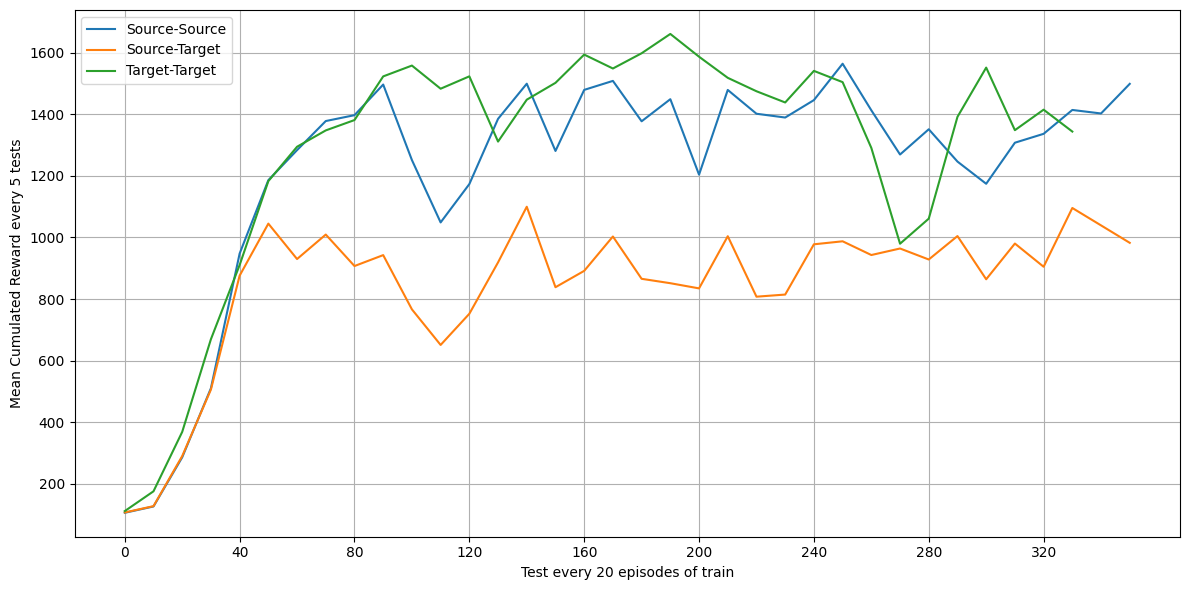

In [ ]:
import matplotlib.pyplot as plt

def plot_group_means_no_window(file_list):
    assert len(file_list) % 3 == 0, "The number should be multiple of 3"

    plt.figure(figsize=(12, 6))

    for i in range(0, len(file_list), 3):
        group = file_list[i:i+3]
        all_values = []

        for filename in group:
            with open(filename, 'r') as f:
                lines = f.readlines()
                # Jumps the first row
                values = [float(line.strip()) for line in lines[1:]]
                all_values.append(values)

        # Cuts the rows at the minimum common lenght
        min_len = min(len(v) for v in all_values)
        all_values = [v[:min_len] for v in all_values]

        # Computes the average per episode
        pointwise_mean = [
            sum(vals) / len(vals)
            for vals in zip(*all_values)
        ]

        # Groups every 50 values and computes the average per block
        block_size = 10
        num_blocks = len(pointwise_mean) // block_size
        pointwise_mean_blocked = [
        sum(pointwise_mean[i*block_size:(i+1)*block_size]) / block_size
        for i in range(num_blocks)]

        # Plot
        plt.plot(pointwise_mean_blocked, markersize=3, label=labels[i//3])
    # Number of plotten blocks
    num_blocks = len(pointwise_mean_blocked)

    tick_interval = 4 

    xticks_positions = list(range(0, num_blocks, tick_interval))
    xticks_labels = [str(i * block_size) for i in xticks_positions]

    plt.xticks(xticks_positions, xticks_labels)

    plt.xlabel('Test every 20 episodes of train')
    plt.ylabel('Mean Cumulated Reward every 5 tests')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



# Esempio di uso:
files = [
    './trained-models/ppo/train-test-experiment/seed-10/source-source/test_rewards_CustomHopper-source-v0.txt',
    './trained-models/ppo/train-test-experiment/seed-20/source-source/test_rewards_CustomHopper-source-v0.txt',
    './trained-models/ppo/train-test-experiment/seed-40/source-source/test_rewards_CustomHopper-source-v0.txt',
    './trained-models/ppo/train-test-experiment/seed-10/source-target/test_rewards_CustomHopper-target-v0.txt',
    './trained-models/ppo/train-test-experiment/seed-20/source-target/test_rewards_CustomHopper-target-v0.txt',
    './trained-models/ppo/train-test-experiment/seed-40/source-target/test_rewards_CustomHopper-target-v0.txt',
    './trained-models/ppo/train-test-experiment/seed-10/target-target/test_rewards_CustomHopper-target-v0.txt',
    './trained-models/ppo/train-test-experiment/seed-20/target-target/test_rewards_CustomHopper-target-v0.txt',
    './trained-models/ppo/train-test-experiment/seed-40/target-target/test_rewards_CustomHopper-target-v0.txt'
]

labels = ['Source-Source', 'Source-Target', 'Target-Target']
plot_group_means_no_window(files)